In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #skala menjadi 0-1
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [2]:
data = pd.read_csv("Dataset-Tugas.csv")
data.head(10)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


**EDA**

In [3]:
data.drop(columns='class', inplace=True)

In [4]:
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data.shape

(150, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
data.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


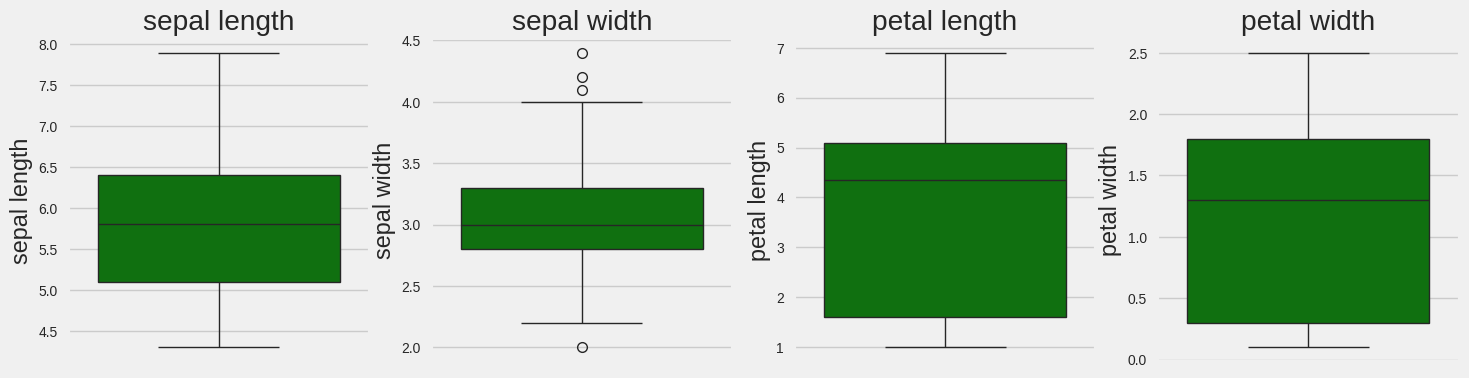

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(data):
    variables = data.select_dtypes(exclude='object').columns

    # jumlah kolom yang dibutuhkan
    num_vars = len(variables)
    fig, axes = plt.subplots(1, num_vars, figsize=(4 * num_vars, 4))

    if num_vars == 1:
        axes = [axes]

    # membuat plot
    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color="green", ax=axes[i])
        axes[i].set_title(var)

    # menampilkan plot
    plt.show()

# memanggil fungsi
box_plot(data)


1. **Sepal Length**
- Median: Nilai median untuk sepal length berada di sekitar 5.8, menunjukkan titik tengah distribusi data. <br>
- Q1 dan Q3: Kuartil pertama (Q1) berada di sekitar 5.1 dan kuartil ketiga (Q3) berada di 6.4, yang menandakan bahwa 50% dari data berada di antara nilai-nilai ini.
- Interquartile Range (IQR): IQR adalah selisih antara Q3 dan Q1, yaitu sekitar 1,3. Rentang ini menggambarkan variasi di mana setengah dari nilai tengah data terdistribusi.
- Whiskers: Whiskers atau batas bawah dan atas berkisar dari sekitar 4.5 hingga 8.0, menunjukkan rentang nilai sepal length yang bukan outlier.
- Outliers: Tidak ada outlier yang teridentifikasi pada sepal length, menandakan distribusi yang cukup konsisten tanpa data yang jauh menyimpang.

2. **Sepal Width**
- Median: Nilai median untuk sepal width 3.0, yang merupakan titik tengah dari data untuk variabel ini. <br>
- Q1 dan Q3: Kuartil pertama (Q1) berada di sekitar 2.8, dan kuartil ketiga (Q3) mendekati 3.3, menandakan rentang interquartil yang cukup sempit.
- Interquartile Range (IQR): IQR untuk sepal width adalah sekitar 0.5, menunjukkan bahwa distribusi data cukup terpusat.
- Whiskers: Batas bawah berada di sekitar 2.0 dan batas atas di 4.5, yang menunjukkan rentang utama data yang tidak termasuk outlier.
- Outliers:Terdapat beberapa outlier di bagian atas sekitar 4.1, 4.2, 4.4 dan bawah sekitar 2.0, yang menunjukkan adanya nilai yang signifikan lebih besar dibandingkan data lainnya. Ini menunjukkan bahwa sebagian kecil bunga memiliki sepal width yang lebih lebar daripada kebanyakan.

3. **Petal Length**
- Median: Nilai median petal length berada disekitar 4.2, menandakan titik tengah dari distribusi data. <br>
- Q1 dan Q3: Q1 berada di sekitar 1.7 dan Q3 berada di sekitar 5.1, menunjukkan bahwa 50% data petal length berada di antara nilai-nilai ini.
- Interquartile Range (IQR): IQR untuk petal length adalah sekitar 3.4, yang menunjukkan bahwa variabel ini memiliki rentang yang lebih luas dan variasi yang tinggi
- Whiskers: Whiskers mencakup nilai dari sekitar 1 hingga 7, menunjukkan sebaran data yang luas.
- Outliers:Tidak ada outlier yang terdeteksi pada petal length, menunjukkan bahwa data terdistribusi dengan baik di dalam rentang ini.

4. **Petal Width**
- Median: Median untuk petal width berada di sekitar 1.3, menunjukkan titik tengah dari data pada variabel ini. <br>
- Q1 dan Q3: Kuartil pertama (Q1) berada sekitar 0.3, dan kuartil ketiga (Q3) berada di sekitar 1.8, menunjukkan rentang interkuartil yang lebih luas.
- Interquartile Range (IQR): IQR untuk petal width adalah sekitar 1.5, yang menunjukkan adanya variasi yang cukup besar di antara data.
- Whiskers: Whiskers mencakup nilai dari sekitar 0 hingga 2.5, menunjukkan rentang penuh data utama untuk variabel ini.
- Outliers:Tidak ada outlier yang terdeteksi pada petal width, menunjukkan distribusi data yang terpusat di sekitar nilai median tanpa nilai yang terlalu menyimpang.

**PRE-PROCESSING**

In [10]:
#SCALING DATA

scaler = MinMaxScaler() #inisialisasi

X_scaled = scaler.fit_transform(data) #fit transform
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

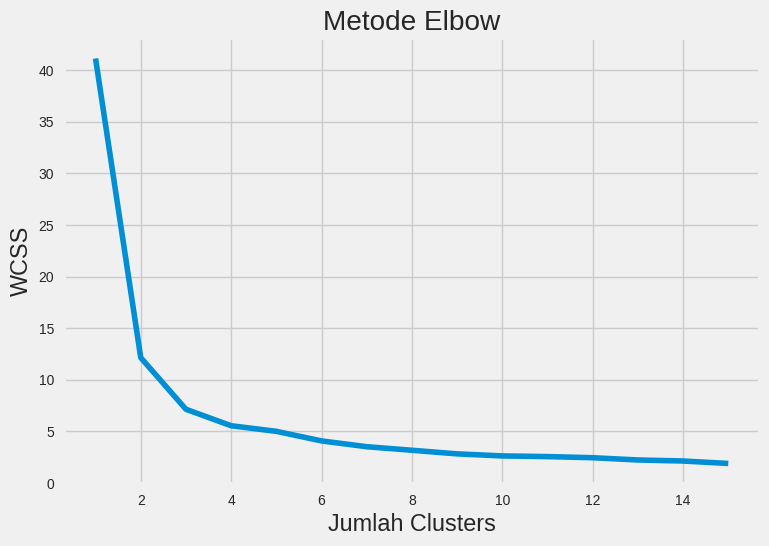

In [11]:
#Menggunakan metode elbow untuk menentukan jumlah claster yang sesuai
wcss = []
for i in range (1,16):
  kmeans = KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,16), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show()

Grafik di atas menunjukkan hasil Metode Elbow untuk menentukan jumlah cluster optimal dengan algoritma KMeans. Sumbu horizontal menunjukkan jumlah cluster, sedangkan sumbu vertikal menunjukkan nilai WCSS (Within-Cluster Sum of Squares), yaitu jumlah variasi di dalam setiap cluster. Dari grafik, terlihat bahwa WCSS menurun tajam dari cluster 1 ke cluster 3, lalu penurunannya melambat setelahnya. Titik di mana grafik mulai melandai—membentuk sudut menyerupai "siku" elbow terjadi di sekitar jumlah cluster 3. Ini menunjukkan bahwa 3 cluster adalah jumlah yang optimal, karena menambahkan lebih banyak cluster setelah titik ini hanya menghasilkan sedikit pengurangan pada WCSS, sehingga tidak memberikan manfaat yang signifikan dalam pemisahan data.

In [12]:
#Menjalankan K-Means clustering ke dataset
model1 = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_pred1 = model1.fit_predict(X_scaled)

In [13]:
data["Label_K-Means"] = model1.labels_
data

,sepal length,sepal width,petal length,petal width,Label_K-Means
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


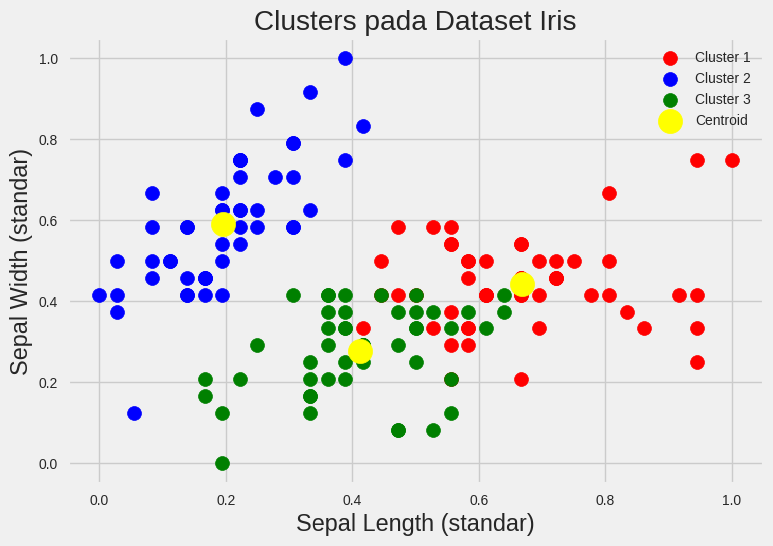

In [14]:
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
            s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
            s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_pred1 == 2, 0], X_scaled[y_pred1 == 2, 1],
            s=100, c='green', label='Cluster 3')
plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroid')

plt.title('Clusters pada Dataset Iris')
plt.xlabel('Sepal Length (standar)')
plt.ylabel('Sepal Width (standar)')
plt.legend()
plt.show()

Gambar diatas menunjukkan hasil klasterisasi pada dataset Iris, di mana data dibagi menjadi tiga kelompok berdasarkan kemiripan karakteristik Sepal Length dan Sepal Width yang telah distandardisasi. Tiga klaster yang terbentuk digambarkan dengan warna berbeda: merah untuk Klaster 1, hijau untuk Klaster 2, dan biru untuk Klaster 3, sementara titik kuning mewakili pusat klaster atau centroid. Klaster biru memiliki karakteristik Sepal Width yang lebih tinggi dengan Sepal Length yang lebih rendah, sedangkan klaster merah menampilkan Sepal Length yang lebih tinggi. Klaster hijau terletak di antara keduanya dengan variasi nilai pada kedua dimensi.

**DB-SCAN**

In [15]:
#Membuat objek dbscan dengan parameter epsilon dan jumlah minimum
model2 = DBSCAN(eps=0.4, min_samples=5)

#Melakukan clustering
model2.fit(X_scaled)

#mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Pemilihan nilai eps=0.4 berdasarkan pada eksperimen, seperti grafik jarak terdekat, untuk memastikan bahwa jarak tersebut optimal dalam memisahkan klaster dengan benar tanpa terlalu banyak mendeteksi noise atau menggabungkan klaster yang berbeda.

In [16]:
data['Label_DB-Scan'] = model2.labels_ #simpan sebagai kolom baru hasil cluster didataset
data.head()

,sepal length,sepal width,petal length,petal width,Label_K-Means,Label_DB-Scan
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


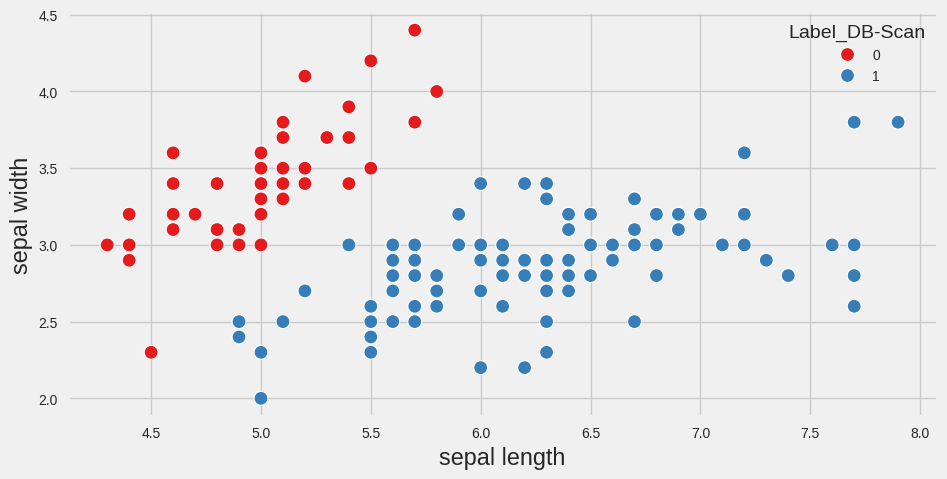

In [17]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='sepal length', y='sepal width',
                hue='Label_DB-Scan', data=data, palette='Set1', s=100);


Gambar diatas merupakan scatter plot yang menunjukkan hubungan antara panjang sepal (sumbu X) dan lebar sepal (sumbu Y) dari dua kelompok data yang berbeda. Titik merah mewakili kelompok pertama (Label 0), yang cenderung memiliki panjang sepal lebih kecil dan lebar sepal yang umumnya lebih tinggi, sedangkan titik biru mewakili kelompok kedua (Label 1), yang memiliki panjang sepal lebih besar dengan lebar sepal yang bervariasi tetapi cenderung lebih rendah.

**Silhouette Score**

In [18]:
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print("Silhouette score: ", Evaluasi_KMeans)

Silhouette score:  0.48247222154221125


**Jika silhouette score semakin mendekati 1 berarti jarak cluster baik**

Nilai Silhouette Score KMeans (0.4825) yang lebih rendah mengindikasikan bahwa titik-titik data dalam cluster KMeans lebih dekat ke perbatasan antar cluster, atau bahkan beberapa titik mungkin lebih dekat dengan titik-titik dari cluster lain. Hal ini menunjukkan bahwa KMeans mengalami kesulitan dalam menangkap struktur cluster pada dataset iris ini.

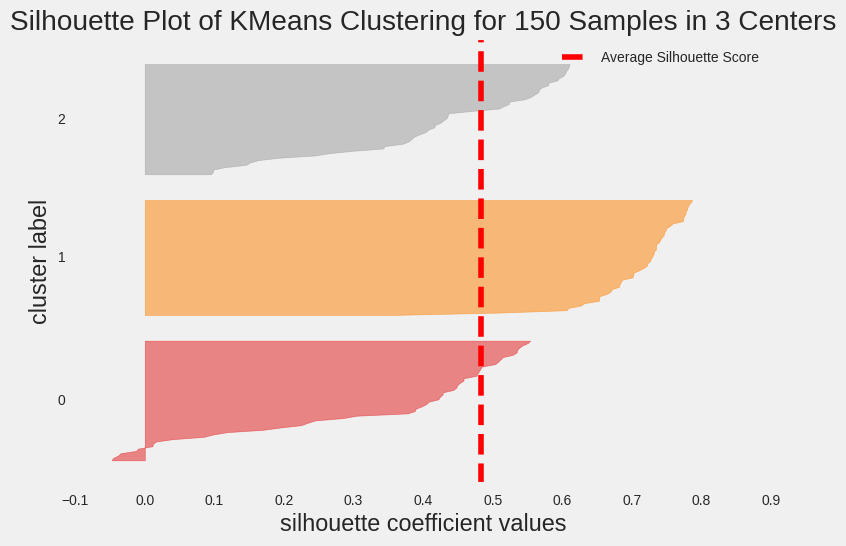

In [19]:
silhouette_viz = SilhouetteVisualizer(model1) #utuk algoritma K-MEANS
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

Gambar di atas adalah plot siluet yang menunjukkan hasil klasterisasi KMeans untuk 150 sampel yang dikelompokkan menjadi tiga klaster (diberi label 0, 1, dan 2). Plot siluet ini membantu menilai seberapa baik sampel-sampel tersebut dikelompokkan dalam klaster masing-masing. Pada sumbu horizontal, terdapat koefisien siluet, yang nilainya berkisar dari -1 hingga 1. Nilai yang lebih tinggi (dekat dengan 1) menandakan bahwa sampel berada di klaster yang tepat, sedangkan nilai mendekati 0 atau negatif menunjukkan sampel yang mungkin lebih cocok berada di klaster lain.

Setiap warna pada plot mewakili klaster yang berbeda. Lebar dari bentuk di setiap klaster menunjukkan variasi nilai koefisien siluet untuk sampel-sampel di dalamnya. Garis merah putus-putus vertikal menandakan nilai rata-rata koefisien siluet, yang berada di sekitar 0,5. Ini menunjukkan bahwa kualitas klasterisasi secara keseluruhan cukup baik, meskipun ada beberapa sampel, terutama di klaster 0 dan 1, yang memiliki nilai siluet rendah, yang berarti sampel-sampel tersebut mungkin kurang cocok dalam klaster mereka.

In [20]:
# Menghitung silhoutte score algoritma DBSCAN
evaluasi_dbscan = silhouette_score(X_scaled, y_pred2)
print("Silhoutte Score:", evaluasi_dbscan)

Silhoutte Score: 0.6294675561906644


**Jika silhouette score semakin mendekati 1 berarti jarak cluster baik**

Dengan Silhouette Score sebesar 0.6295 pada DBSCAN yang lebih tinggi dibandingkan dengan KMeans, ini menandakan bahwa DBSCAN lebih efektif dalam memisahkan dan mengelompokkan data dengan baik dibandingkan KMeans. Skor ini menunjukkan bahwa DBSCAN menciptakan cluster yang lebih "rapat" dan kohesif, dengan titik data lebih dekat dengan anggota dalam cluster yang sama. Ini juga menunjukkan bahwa cluster dari DBSCAN memiliki pemisahan yang lebih kuat terhadap cluster lain.

**Mengapa DBSCAN Lebih Baik pada Silhouette Score?**

- **Pemisahan Antar Cluster yang Baik**, DBSCAN mengelompokkan titik-titik berdasarkan kepadatan, yang berarti cluster terbentuk sesuai konsentrasi titik-titik yang berdekatan. Akibatnya, cluster DBSCAN cenderung memiliki pemisahan yang jelas dan tidak saling tumpang tindih. Ini menghasilkan nilai DBI yang lebih rendah.<br>
- **Kohesi Tinggi dalam Cluster**, Karena DBSCAN mengandalkan konsep tetangga yang dekat (kepadatan), titik-titik yang dikelompokkan dalam cluster memiliki kedekatan yang kuat satu sama lain, meningkatkan kohesi dalam cluster tersebut. <br>
- **Tidak Memaksa Pembentukan Cluster pada Titik yang Tidak Sesuai**, DBSCAN mengenali outlier sebagai noise, sementara KMeans menganggap semua titik harus dimasukkan ke dalam suatu cluster. Akibatnya, KMeans dapat menghasilkan cluster yang memiliki elemen kurang terkait, menurunkan kohesi dan meningkatkan DBI.

**Kesimpulan Silhouette Score**: Berdasarkan nilai yang lebih tinggi pada DBSCAN, kita bisa menyimpulkan bahwa DBSCAN lebih baik dalam menangkap struktur data alami dalam dataset ini dibandingkan KMeans, memberikan hasil clustering dengan keterpisahan dan kohesi yang lebih tinggi.

**DAVIES BOULDIN INDEX (BDI)**

In [21]:
#Menghitung davies bouldin indeks algoritma k-means
doi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies Bouldin Index (DBBI):", doi_score1)

Davies Bouldin Index (DBBI): 0.7874978912757878


**Jika nilai davies bouldin index mendekati 0 maka semakin bagus hasil kekompakan cluster**

Score davies bouldin index (BDI) : 0.7874978912757878 menunjukkan nilai DBI yang lebih tinggi, yang artinya KMeans menghasilkan cluster yang lebih dekat satu sama lain (kurang terpisah) dan memiliki beberapa cluster yang saling tumpang tindih atau memiliki bentuk yang tidak sesuai dengan data sebenarnya.

In [22]:
#Menghitung davies bouldin indeks algoritma DB-Scan
doi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print("Davies Bouldin Index (DBBI):", doi_score2)

Davies Bouldin Index (DBBI): 0.48770481288357487


**Jika nilai davies bouldin index mendekati 0 maka semakin bagus hasil kekompakan cluster**

Score davies bouldin index (BDI) : 0.48770481288357487 menunjukkan hasil clustering yang lebih baik daripada KMeans berdasarkan nilai DBI. Angka ini menunjukkan bahwa cluster yang dihasilkan DBSCAN memiliki tingkat pemisahan antar cluster yang baik dengan jarak antar-cluster yang besar, serta kohesi yang tinggi di dalam cluster masing-masing.

**Mengapa DBI DBSCAN Lebih Rendah?**

- **Pemisahan Antar Cluster yang Baik**, DBSCAN mengelompokkan titik-titik berdasarkan kepadatan, yang berarti cluster terbentuk sesuai konsentrasi titik-titik yang berdekatan. Akibatnya, cluster DBSCAN cenderung memiliki pemisahan yang jelas dan tidak saling tumpang tindih. Ini menghasilkan nilai DBI yang lebih rendah. <br>
- **Kohesi Tinggi dalam Cluster**, Karena DBSCAN mengandalkan konsep tetangga yang dekat (kepadatan), titik-titik yang dikelompokkan dalam cluster memiliki kedekatan yang kuat satu sama lain, meningkatkan kohesi dalam cluster tersebut. <br>
- **Tidak Memaksa Pembentukan Cluster pada Titik yang Tidak Sesuai**, DBSCAN mengenali outlier sebagai noise, sementara KMeans menganggap semua titik harus dimasukkan ke dalam suatu cluster. Akibatnya, KMeans dapat menghasilkan cluster yang memiliki elemen kurang terkait, menurunkan kohesi dan meningkatkan DBI.

**Kesimpulan DBI** : Berdasarkan nilai DBI yang lebih rendah pada DBSCAN, dapat disimpulkan bahwa DBSCAN lebih unggul dalam menghasilkan cluster yang jelas terpisah dan kohesif. Ini membuat DBSCAN lebih efektif pada dataset iris ini dibandingkan KMeans, terutama jika dataset mengandung cluster dengan kepadatan atau bentuk yang bervariasi.

**Kesimpulan Akhir**

Berdasarkan hasil evaluasi diatas, algoritma DBSCAN merupakan pilihan terbaik untuk dataset Iris. DBSCAN menghasilkan cluster yang lebih jelas dan terpisah dengan baik, karena algoritma ini mampu menangani variasi bentuk dan kepadatan cluster dalam data. Dengan menggunakan pendekatan berbasis kepadatan, DBSCAN dapat mengelompokkan data Iris secara lebih efektif tanpa terikat pada asumsi bentuk bulat atau ukuran yang seragam, yang sering menjadi kelemahan pada KMeans. Selain itu, DBSCAN secara otomatis mengenali outlier atau titik data yang tidak sesuai pola sebagai "noise," sehingga tidak memasukkannya ke dalam cluster dan menghasilkan pembagian data yang lebih bersih dan fokus. Dengan fleksibilitas dan kemampuan menangani outlier ini, DBSCAN merupakan algoritma yang paling sesuai untuk mengelompokkan data pada dataset Iris.